In [1]:
"""
- Do attention values offer new insights on pathways?

Adham Beyki
PRaDA - A2I2 - Deakin University
2018-11-20
"""

import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
# import mpld3
# mpld3.enable_notebook()

In [2]:
RESULTS_PATH = "exp6.pkl"
PATHWAY_DATA_PATH = '../data/pathway_data.pkl'

In [3]:
# read data
results_data = pd.read_pickle(RESULTS_PATH)
data = pd.read_pickle(PATHWAY_DATA_PATH)

pathway_df = data['pathway_df']
train_idxs, test_idxs = data['train_idxs'], data['test_idxs']
betas = np.squeeze(results_data['betas']).astype(np.float)

# ground truth
c2i = {'LumA':1, 'LumB': 0}
y_test = pathway_df.loc[test_idxs]['PAM50'].tolist()
y_test = np.array([c2i[yy] for yy in y_test])

Text(0, 0.5, 'patients')

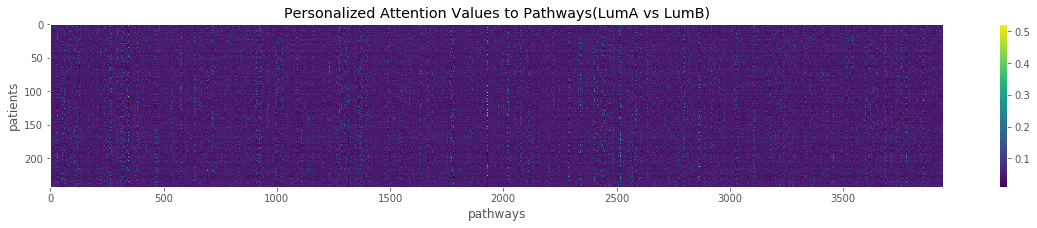

In [4]:
# plot attention values
fig, ax = plt.subplots(figsize=(20, 3))
cax = ax.imshow(np.power(betas, 1/3), aspect='auto')
fig.colorbar(cax)
ax.grid(False)
ax.set_title('Personalized Attention Values to Pathways(LumA vs LumB)')
ax.set_xlabel('pathways')
ax.set_ylabel('patients')

Text(0, 0.5, 'patients')

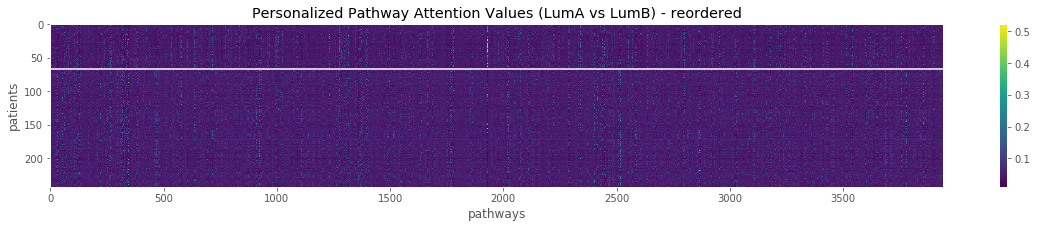

In [5]:
fig, ax = plt.subplots(figsize=(20, 3))
cax = ax.imshow(
    np.power(np.vstack([betas[y_test==0], betas[y_test==1]]), 1/3), 
    aspect='auto'
)
ax.hlines(betas[y_test==0].shape[0], 0, betas.shape[1]-1, 'w')
fig.colorbar(cax)
ax.grid(False)
ax.set_title('Personalized Pathway Attention Values (LumA vs LumB) - reordered')
ax.set_xlabel('pathways')
ax.set_ylabel('patients')

<hr>

In [6]:
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

from sklearn import metrics

In [7]:
# kmeans = KMeans(n_clusters=2)
# kmeans.fit(betas)

# # check if labels have switched
# kmeans.labels_[y_test==1]

# print(metrics.classification_report(y_test, kmeans.labels_))
# print(metrics.confusion_matrix(y_test, kmeans.labels_))

Text(0.5, 1.0, 'NMF weight matrix for attention weights')

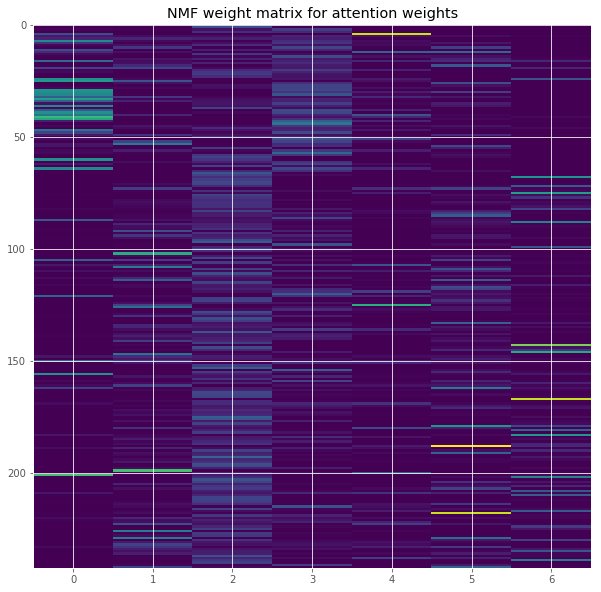

In [7]:
# Apply NMF on attention values and 

nmf = NMF(n_components=7, init='random', random_state=1)
W = nmf.fit_transform(betas)
H = nmf.components_

kmeans = KMeans(n_clusters=2)
kmeans.fit(W)

fig, ax = plt.subplots(figsize=(10, 10))
W_ = np.vstack([W[y_test==0], W[y_test==1]])
ax.imshow(W_, aspect='auto')
ax.set_title('NMF weight matrix for attention weights')

In [84]:
# kmeans = KMeans(n_clusters=2)
# kmeans.fit(W[:, 0].reshape(-1, 1))
# kmeans.fit(W)

# # check if labels have switched
# kmeans.labels_[y_test==1]

# corrected_labels = (~kmeans.labels_.astype(bool)).astype(int)
# corrected_labels = kmeans.labels_
# print(metrics.classification_report(y_test, corrected_labels))
# metrics.confusion_matrix(y_test, corrected_labels)

W obtained from NMF on attention values

factor 0
GO:0051383 1.3531
GO:0016447 0.2879
GO:1902916 0.1729
GO:0007077 0.0817
GO:0007256 0.0537

factor 1
GO:0033146 0.8262
GO:0003223 0.1986
GO:0006903 0.1236
GO:2000352 0.1145
GO:0046850 0.1014

factor 2
GO:0006655 0.1945
GO:1903608 0.1914
GO:0042493 0.1520
GO:0001963 0.1261
GO:1900127 0.1216

factor 3
GO:0098586 0.4974
GO:0070979 0.4191
GO:1903862 0.3193
GO:1902916 0.2339
GO:0045471 0.1777

factor 4
GO:0060047 0.7273
GO:0016447 0.2788
GO:0070979 0.2482
GO:0007602 0.0869
GO:0032095 0.0624

factor 5
GO:1903307 0.4464
GO:0060738 0.2378
GO:0006487 0.1210
GO:0098586 0.1209
GO:0030277 0.0945

factor 6
GO:0061158 0.6907
GO:0031668 0.4391
GO:0008219 0.1204
GO:2000178 0.0788
GO:0007296 0.0616


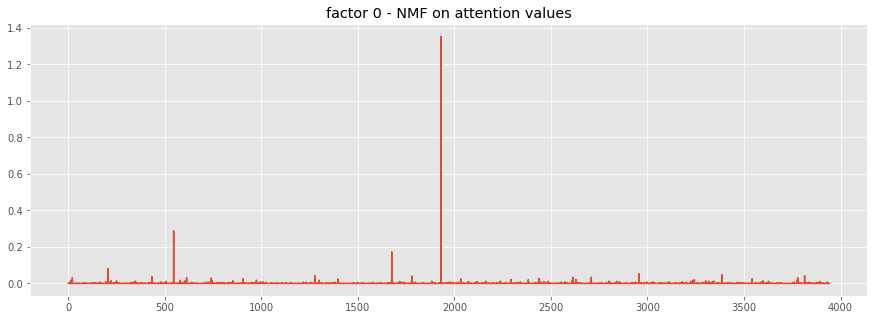

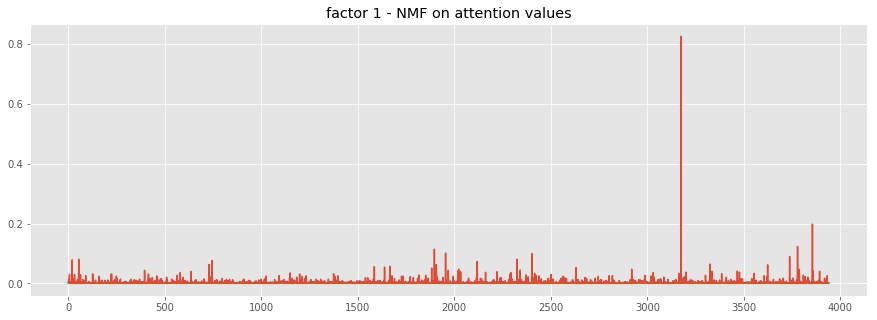

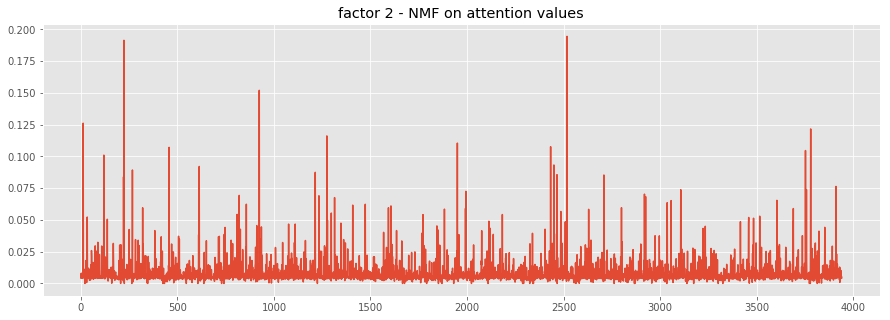

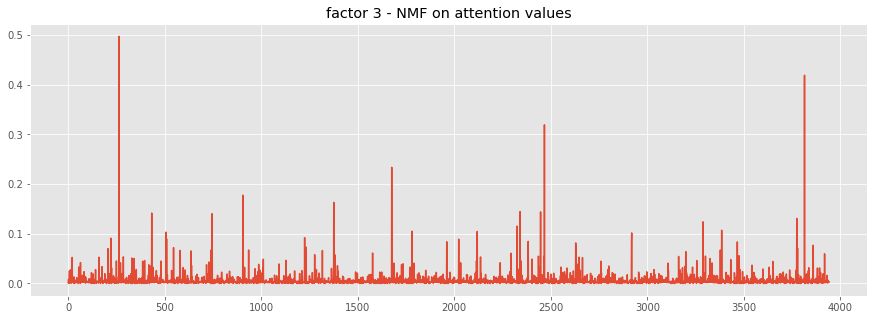

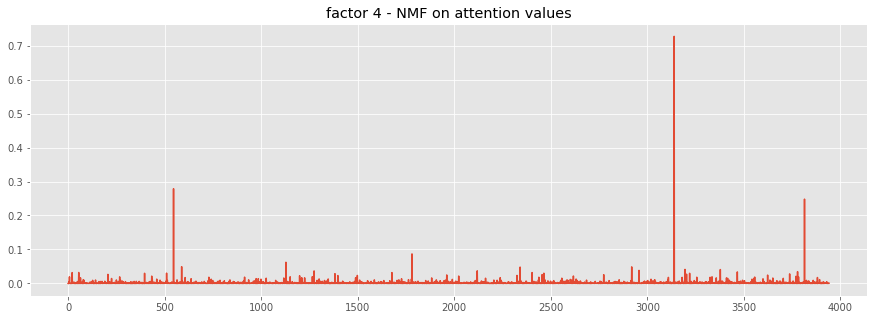

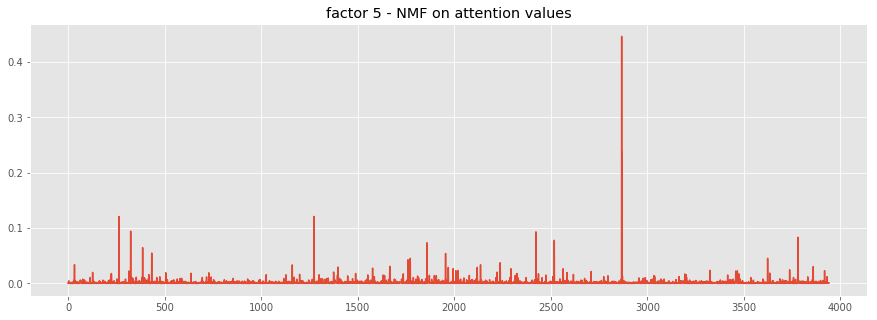

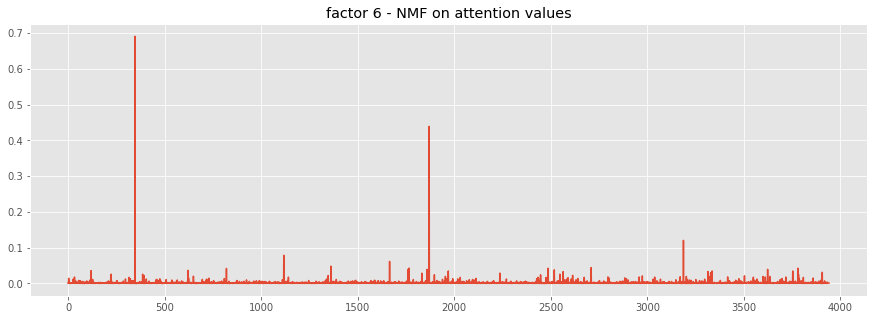

In [25]:
print('W obtained from NMF on attention values')
for i in range(7):
    idxs = H[i].argsort()[::-1][:5]
    print()
    print('factor', i)
    for idx in idxs:
        print(pathway_df.columns[idx], '{:.4f}'.format(H[i][idx]))

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(np.arange(H.shape[1]), H[i])
    ax.set_title('factor {} - NMF on attention values'.format(i))
    

<hr>

## NMF on pathways

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer

In [27]:
cols = pathway_df.columns[:-2]
X_train = pathway_df.loc[train_idxs][cols].values
y_train = pathway_df.loc[train_idxs]['PAM50'].apply(lambda x: c2i[x]).values

In [28]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train).toarray()

In [29]:
nmf = NMF(n_components=7)
W = nmf.fit_transform(X_train)
H = nmf.components_

Text(0.5, 1.0, 'W obtained from NMF applied on pathways - training data')

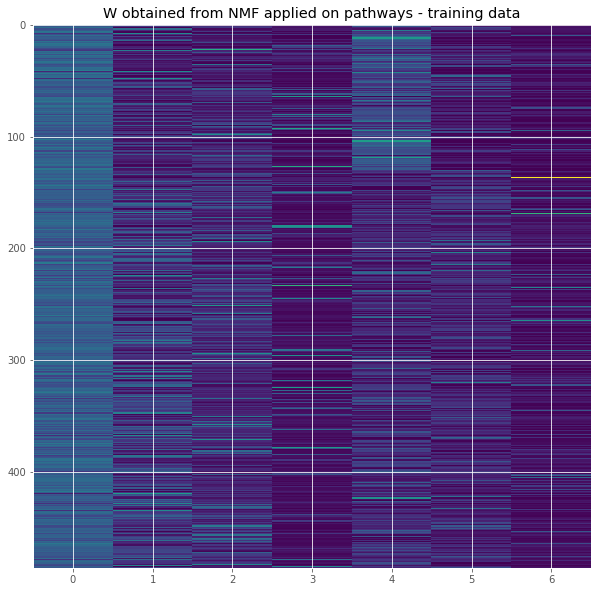

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
W_ = np.vstack([W[y_train==0], W[y_train==1]])
ax.imshow(W_, aspect='auto')
ax.set_title("W obtained from NMF applied on pathways - training data")

In [31]:
X_test = pathway_df.loc[test_idxs][cols].values
y_test = pathway_df.loc[test_idxs]['PAM50'].apply(lambda x: c2i[x]).values
X_test = tfidf.transform(X_test)

Text(0.5, 1.0, 'W obtained from NMF applied on pathways - test data')

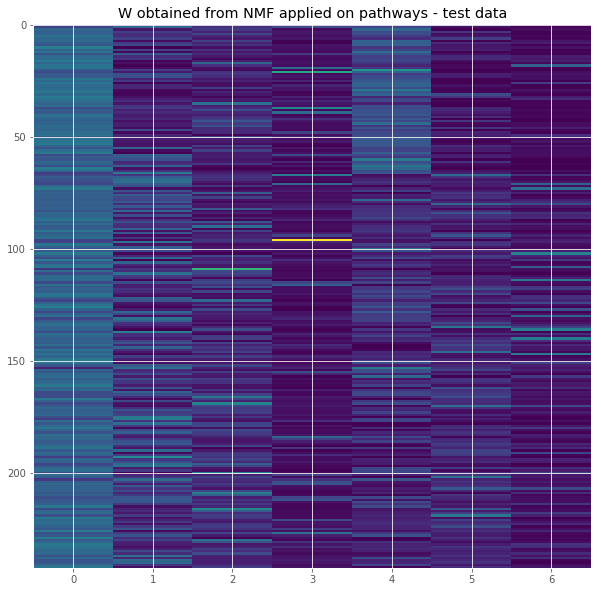

In [32]:
W_test = nmf.transform(X_test)
fig, ax = plt.subplots(figsize=(10, 10))
W_ = np.vstack([W_test[y_test==0], W_test[y_test==1]])
ax.imshow(W_, aspect='auto')
ax.set_title("W obtained from NMF applied on pathways - test data")

W obtained from NMF on pathways

factor 0
GO:0045944 1.1975
GO:0006351 1.0016
GO:0000122 0.8584
GO:0007165 0.8528
GO:0006355 0.7069

factor 1
GO:0030198 0.9859
GO:0030574 0.6957
GO:0001501 0.6234
GO:0030199 0.5930
GO:0071230 0.5722

factor 2
GO:0006413 0.7473
GO:0006412 0.7320
GO:0000184 0.7294
GO:0006364 0.7220
GO:0006614 0.7103

factor 3
GO:0007165 0.2956
GO:0044267 0.2634
GO:0043568 0.2272
GO:0045944 0.1931
GO:0008284 0.1911

factor 4
GO:0007165 0.3268
GO:0043312 0.2406
GO:0045893 0.2072
GO:0016032 0.2026
GO:0043066 0.1901

factor 5
GO:0043312 0.3169
GO:0007165 0.2465
GO:0043066 0.2436
GO:0045944 0.2365
GO:0043123 0.2135

factor 6
GO:0006508 0.5186
GO:0043312 0.1826
GO:0010628 0.1766
GO:0007165 0.1764
GO:0044267 0.1696


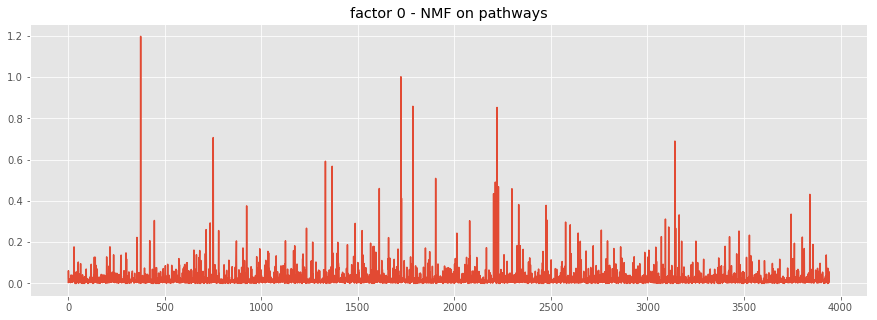

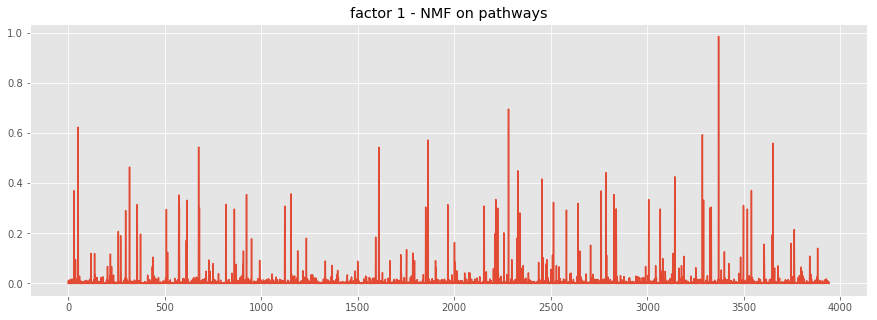

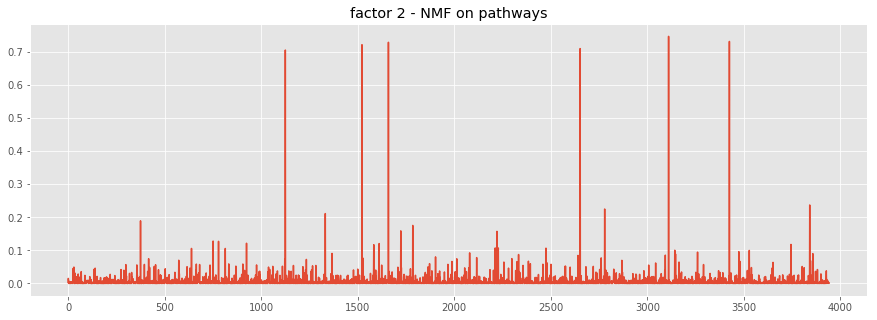

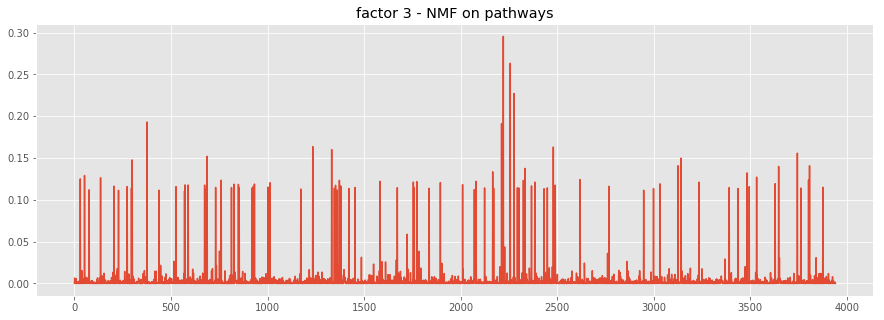

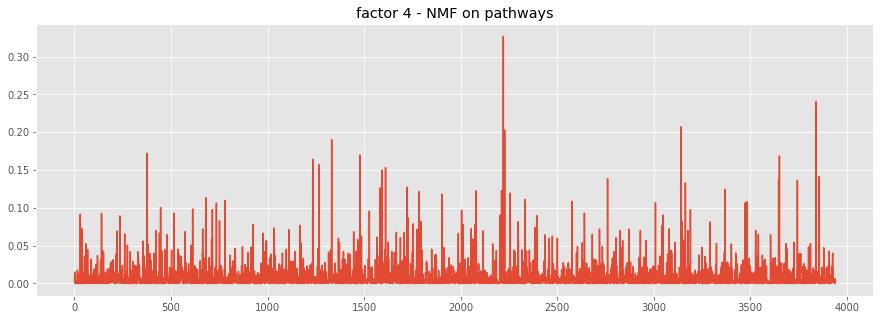

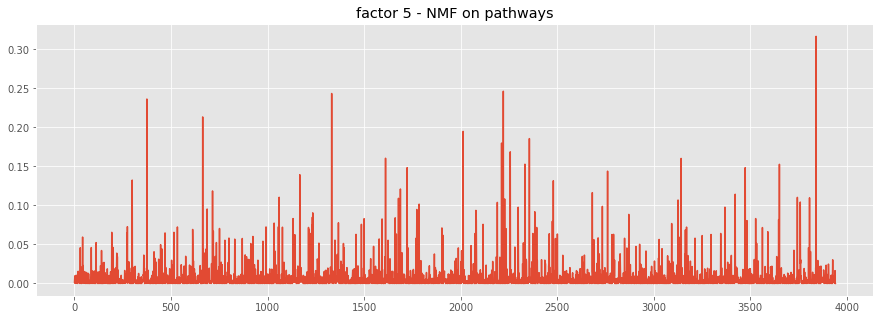

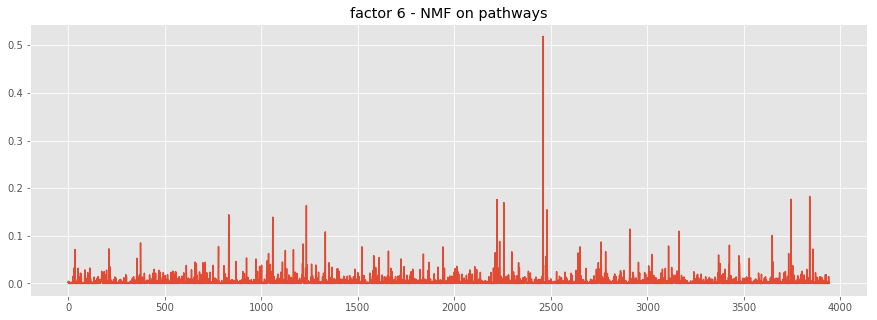

In [33]:
print('W obtained from NMF on pathways')
for i in range(7):
    idxs = H[i].argsort()[::-1][:5]
    print()
    print('factor', i)
    for idx in idxs:
        print(pathway_df.columns[idx], '{:.4f}'.format(H[i][idx]))

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(np.arange(H.shape[1]), H[i])
    ax.set_title('factor {} - NMF on pathways'.format(i))
     